In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "species"]
df = pd.read_csv("seeds\\seeds_dataset.txt", names=cols,sep="\s+")

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sanja\AppData\Local\Temp\ipykernel_23624\647179307.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("seeds\\seeds_dataset.txt", names=cols,sep="\s+")


In [9]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


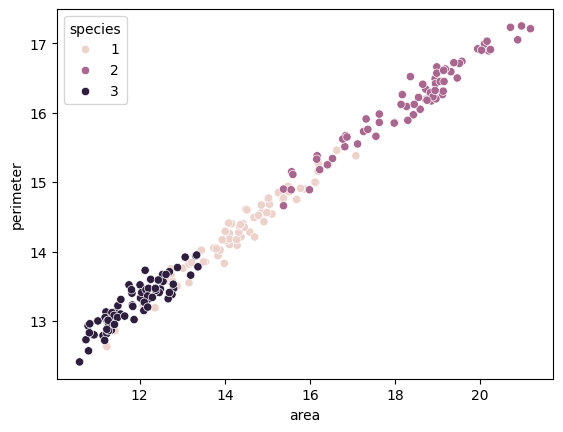

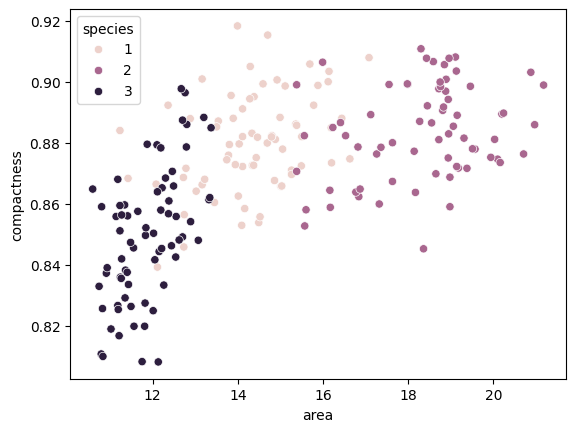

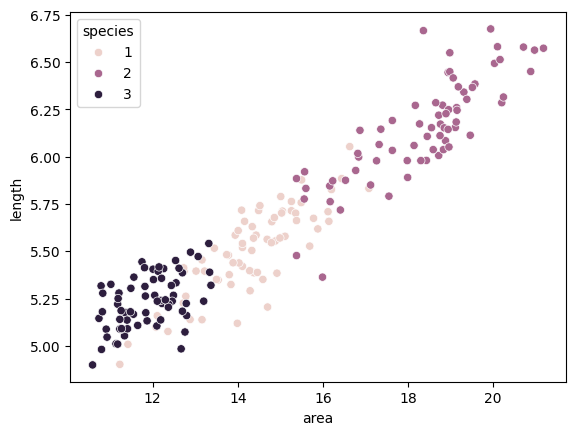

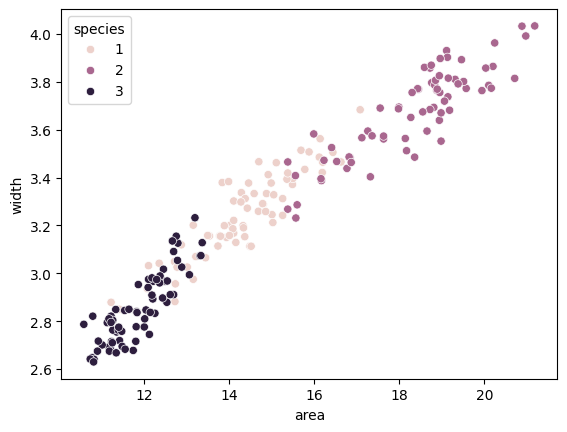

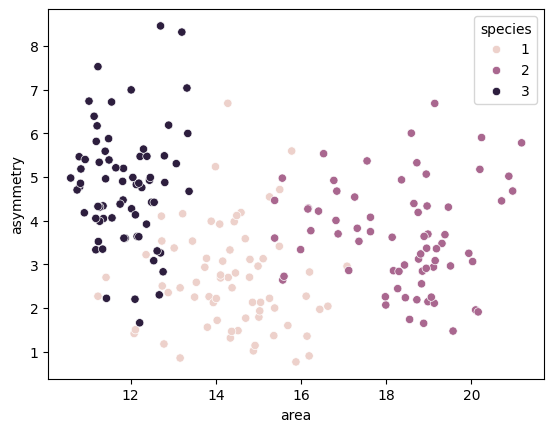

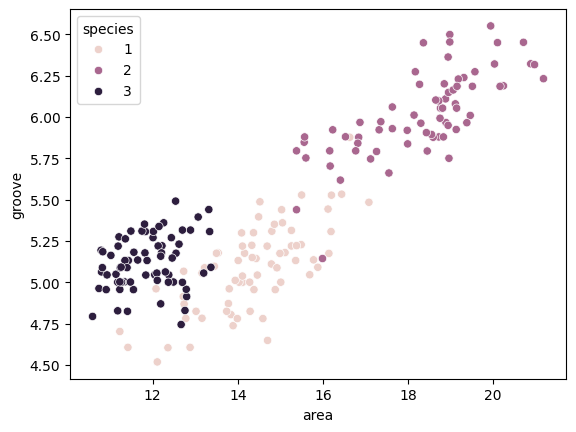

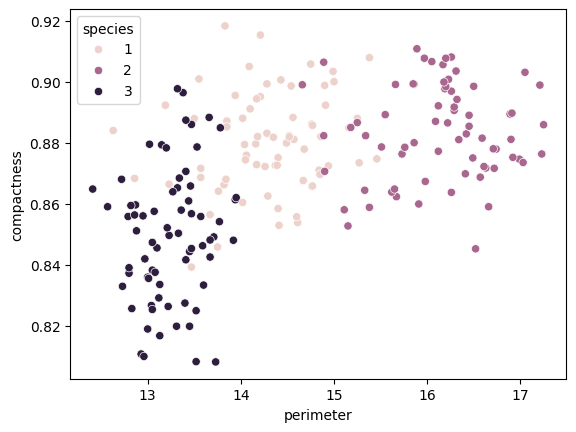

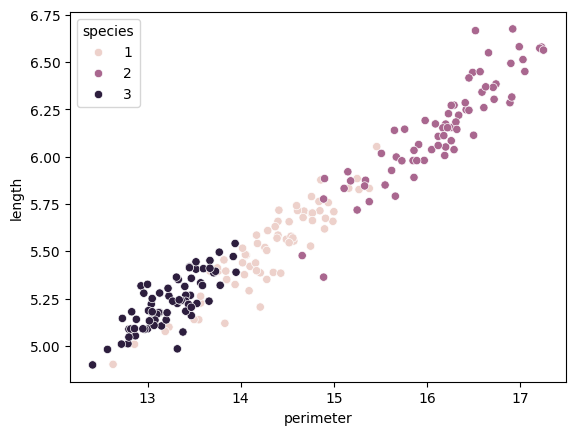

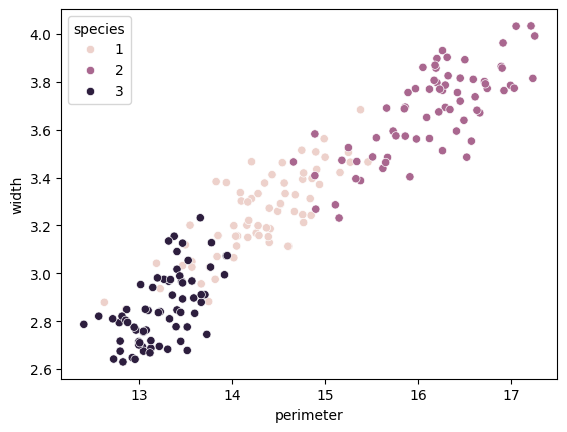

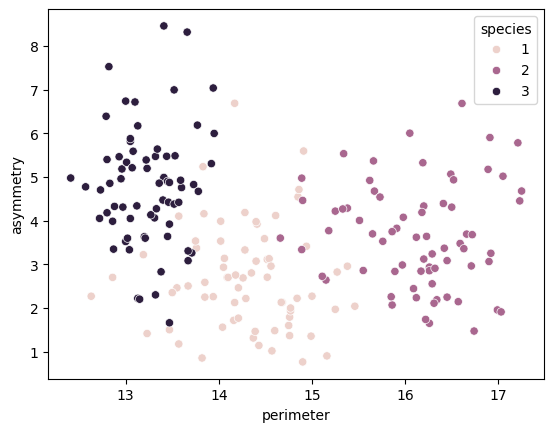

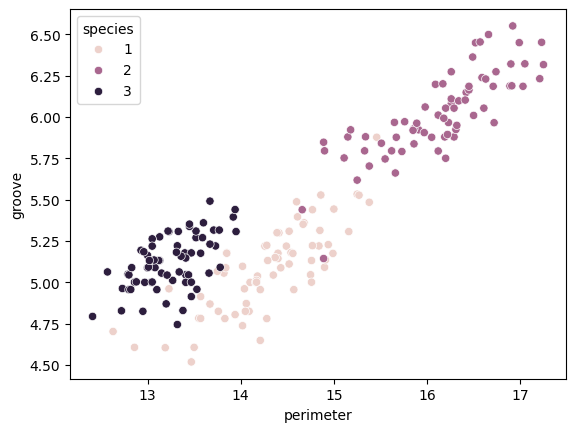

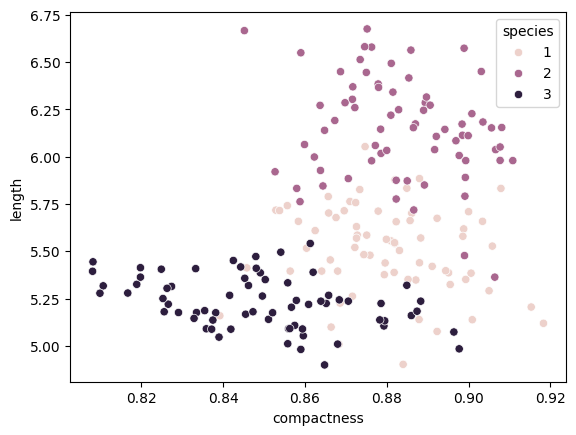

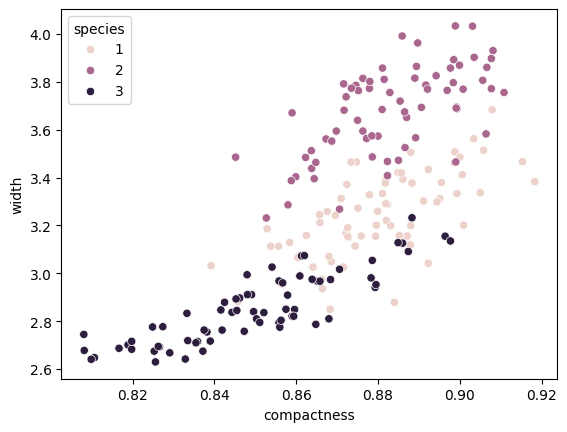

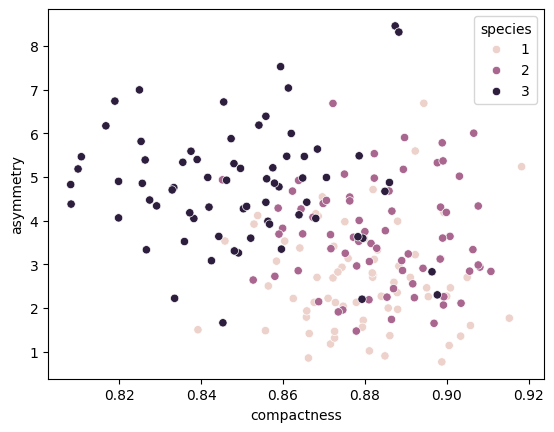

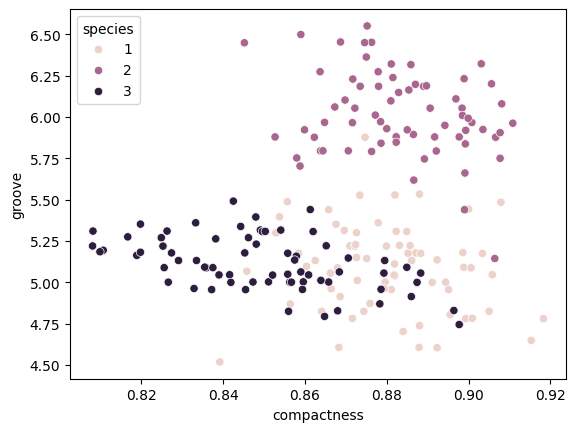

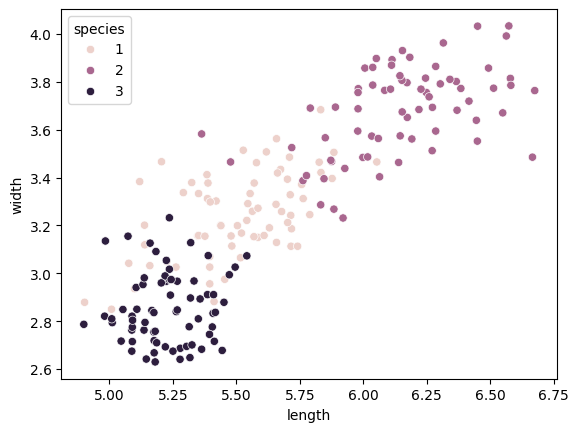

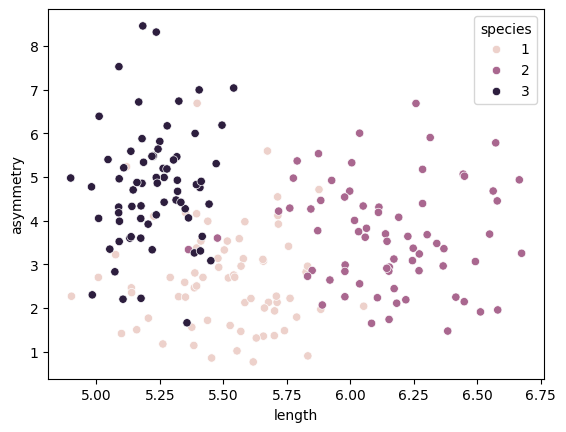

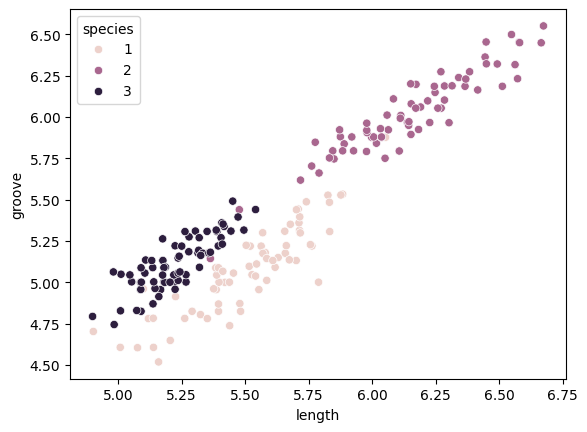

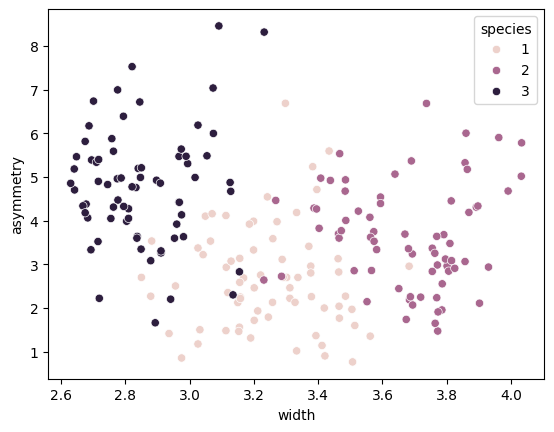

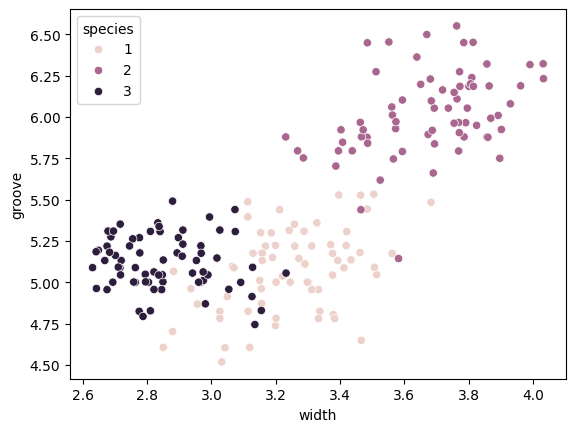

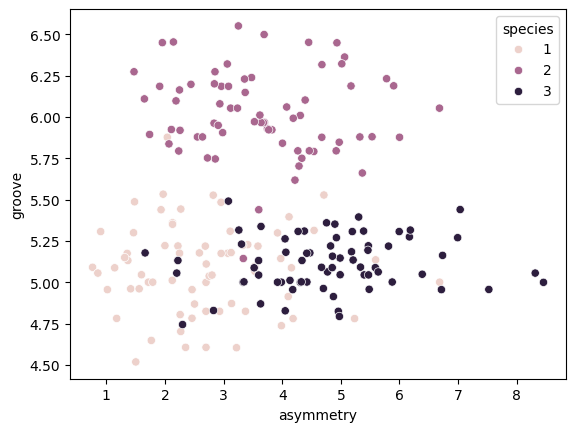

In [11]:
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='species')
        plt.show()

Clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
x = "perimeter"
y = "asymmetry"
X = df[[x, y]].values

In [14]:
kmeans = KMeans(n_clusters=3).fit(X)

In [15]:
clusters = kmeans.labels_

In [16]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

In [18]:
df["species"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [19]:
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "species"])

<Axes: xlabel='perimeter', ylabel='asymmetry'>

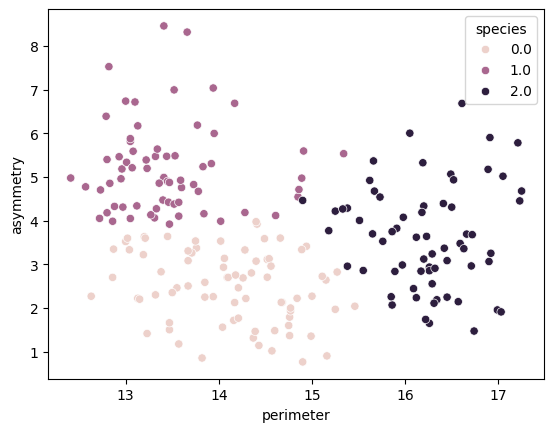

In [20]:
sns.scatterplot(x=x, y=y, data=clusters_df, hue="species")

<Axes: xlabel='perimeter', ylabel='asymmetry'>

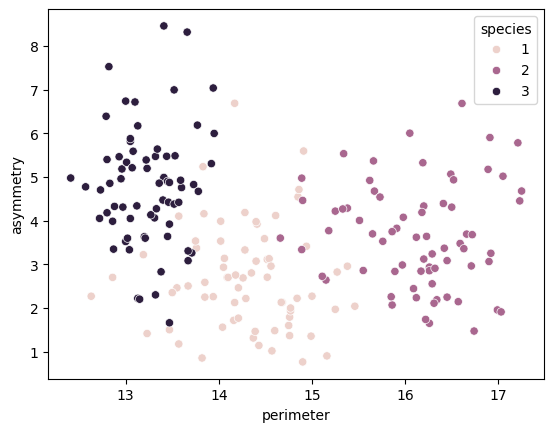

In [21]:
sns.scatterplot(x=x, y=y, data=df, hue="species")

Higher Dimensions

In [22]:
X = df[cols[:-1]].values

In [23]:
kmeans = KMeans(n_clusters=3).fit(X)

In [25]:
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=df.columns)

<Axes: xlabel='perimeter', ylabel='asymmetry'>

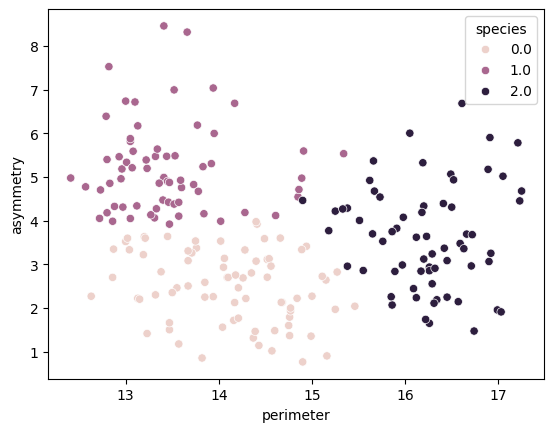

In [26]:
sns.scatterplot(x=x, y=y, data=clusters_df, hue="species")

<Axes: xlabel='perimeter', ylabel='asymmetry'>

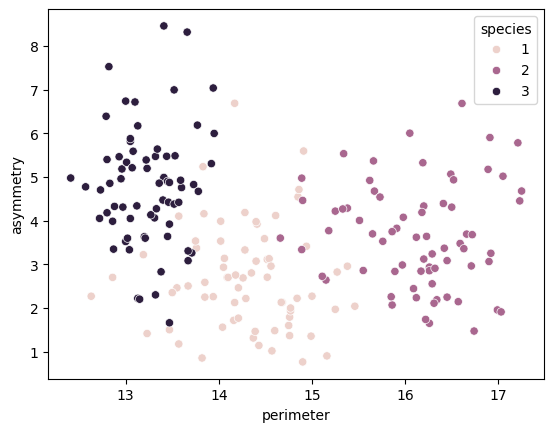

In [27]:
sns.scatterplot(x=x, y=y, data=df, hue="species")

# PCA

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)

In [30]:
transformed_X = pca.fit_transform(X)

In [31]:
X.shape

(210, 7)

In [32]:
transformed_X.shape

(210, 2)

In [33]:
transformed_X[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

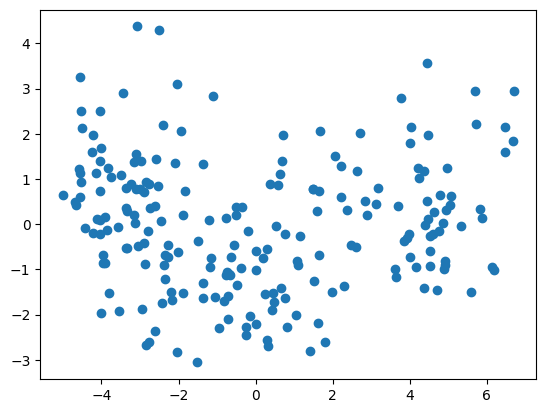

In [35]:
plt.scatter(transformed_X[:, 0], transformed_X[:, 1])

In [36]:
pca_df =pd.DataFrame(np.hstack((transformed_X, kmeans.labels_.reshape(-1, 1))), columns=["PC1", "PC2", "species"])

In [38]:
truth_pca_df =pd.DataFrame(np.hstack((transformed_X, df["species"].values.reshape(-1, 1))), columns=["PC1", "PC2", "species"])

<Axes: xlabel='PC1', ylabel='PC2'>

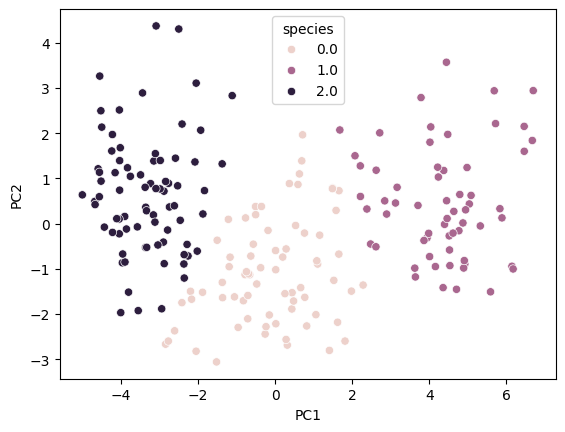

In [39]:
sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue="species")

<Axes: xlabel='PC1', ylabel='PC2'>

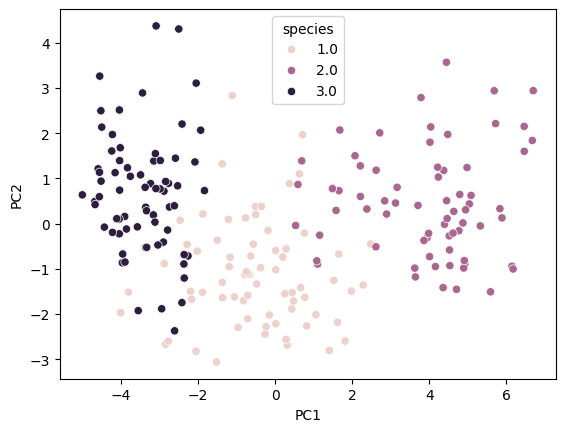

In [40]:
sns.scatterplot(x="PC1", y="PC2", data=truth_pca_df, hue="species")